In [9]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kisho\OneDrive\Desktop\Projects\AMEX\train_data.ftr"  
df_train = pd.read_feather(file_path)

# Display basic info about the dataset
df_train.info()

# Display first few rows
df_train.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1), object(1)
memory usage: 2.0+ GB


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


In [10]:

# Load the Test dataset 
file_path = r"C:\Users\kisho\OneDrive\Desktop\Projects\AMEX\test_data.ftr"
df_test = pd.read_feather(file_path)

# Display basic info
df_test.info()

# Display first few rows
df_test.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), datetime64[ns](1), float16(177), object(1)
memory usage: 4.0+ GB


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631348,0.001912,0.010727,0.814453,0.007545,0.168701,0.009972,0.002348,...,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008278,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.586914,0.005276,0.011024,0.811035,0.001817,0.241333,0.000166,0.009132,...,NaN,NaN,NaN,0.000142,0.004940,0.009018,NaN,0.003695,0.003754,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.608887,0.003326,0.016388,1.004883,0.000114,0.267090,0.004196,0.004192,...,NaN,NaN,NaN,0.000074,0.002113,0.004658,NaN,0.003155,0.002155,0.006481
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614746,0.009064,0.021667,0.816406,0.009720,0.188965,0.004124,0.015327,...,NaN,NaN,NaN,0.004742,0.006393,0.002890,NaN,0.006042,0.005207,0.007858
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591797,0.238770,0.015930,0.810547,0.002026,0.180054,0.000731,0.011284,...,NaN,NaN,NaN,0.008133,0.004330,0.008385,NaN,0.001008,0.007420,0.009468


In [11]:
import numpy as np

# Convert float16 columns to float32 to avoid overflow
for col in df_train.select_dtypes(include=['float16']).columns:
    df_train[col] = df_train[col].astype(np.float32)

# Checking missing values percentage per column
missing_values = df_train.isnull().sum() / len(df_train) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the top 10 features with the highest missing percentage
print(missing_values.head(10))

# Check unique customers
unique_customers = df_train['customer_ID'].nunique()
print(f"\nTotal Unique Customers: {unique_customers}")


D_87     99.930127
D_88     99.891457
D_108    99.476846
D_110    99.433530
D_111    99.433530
B_39     99.391986
D_73     98.990211
B_42     98.707789
D_134    96.480146
D_137    96.480146
dtype: float64

Total Unique Customers: 458913


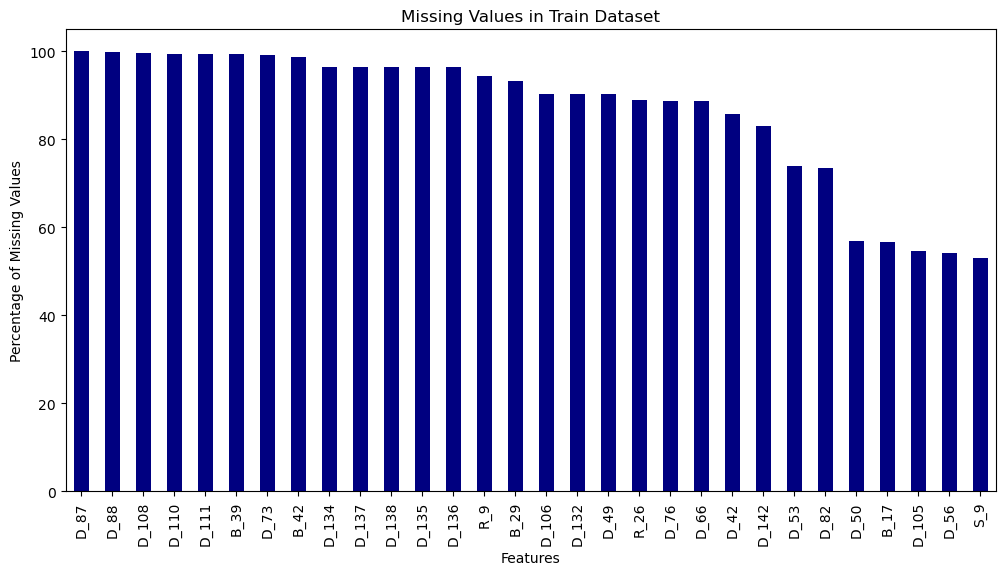

In [12]:
# Visualization of missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
missing_values[:30].plot(kind="bar", color="navy")  # Limiting to first 30 features for readability
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values in Train Dataset")
plt.show()

In [13]:
# Drop columns with more than 95% missing values
threshold = 95  
cols_to_drop = missing_values[missing_values > threshold].index.tolist()
df_train.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped {len(cols_to_drop)} columns with more than {threshold}% missing values.")


Dropped 13 columns with more than 95% missing values.


B_17     38.353314
D_53     25.867862
D_56     22.868839
D_77     21.975208
R_26     19.468000
D_42     19.053082
D_49     15.868331
D_132    15.770673
D_106    15.749496
D_50     15.622105
dtype: float64


C:\Users\kisho\AppData\Local\Temp\ipykernel_39136\1721582264.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_target = df_train.groupby("target").apply(lambda x: x.isnull().mean() * 100)


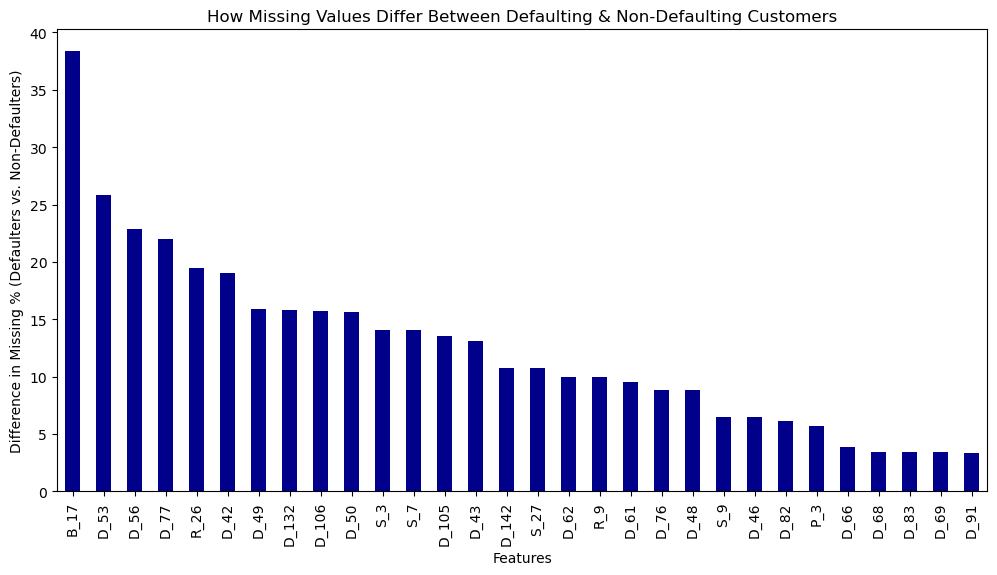

In [14]:

# Group missing values by target (0 = No Default, 1 = Default)
missing_by_target = df_train.groupby("target").apply(lambda x: x.isnull().mean() * 100)

# Show the top 10 features where missing values differ the most between target groups
diff_missing = (missing_by_target.loc[1] - missing_by_target.loc[0]).abs().sort_values(ascending=False)
print(diff_missing.head(10))

# Visualizing Missing Data Difference Between Defaults vs Non-Defaults
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
diff_missing[:30].plot(kind="bar", color="darkblue")
plt.xlabel("Features")
plt.ylabel("Difference in Missing % (Defaulters vs. Non-Defaulters)")
plt.title("How Missing Values Differ Between Defaulting & Non-Defaulting Customers")
plt.show()


In [19]:

# Create Missing Indicator Columns in One Step
important_missing_features = ['B_17', 'D_53', 'D_56', 'D_77', 'R_26', 'D_42', 'D_49', 'D_132', 'D_106', 'D_50']
missing_indicators = df_train[important_missing_features].isnull().astype(int)
missing_indicators.columns = [f"{col}_missing" for col in missing_indicators.columns]

# Concatenate missing indicators to the original DataFrame
df_train = pd.concat([df_train, missing_indicators], axis=1)

# Impute Missing Values
num_cols = df_train.select_dtypes(include=['float32', 'float64']).columns
cat_cols = df_train.select_dtypes(include=['category']).columns

# Fill numerical columns with median
df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())

# Fill categorical columns with mode
df_train[cat_cols] = df_train[cat_cols].fillna(df_train[cat_cols].mode().iloc[0])

#  Recheck Missing Values
missing_after = df_train.isnull().sum().sum()

#Optimize DataFrame Memory Usage
df_train = df_train.copy()  


In [20]:
missing_after

0

C:\Users\kisho\AppData\Local\Temp\ipykernel_39136\3640593144.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train['target'], palette=[amex_blue, amex_light_blue])


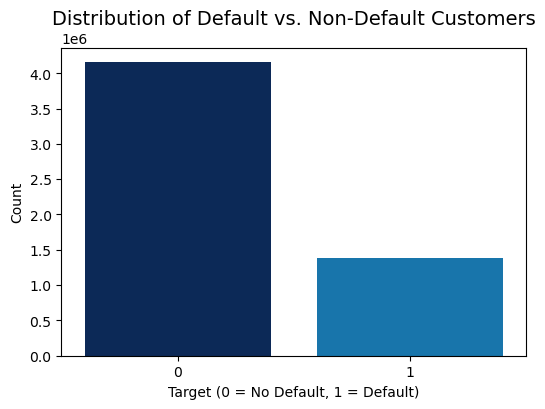

Class Distribution:
target
0    75.090279
1    24.909721
Name: proportion, dtype: float64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


amex_blue = "#002663"  # Dark Blue
amex_light_blue = "#007CC3"  # Light Blue

# Plot Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df_train['target'], palette=[amex_blue, amex_light_blue])
plt.title("Distribution of Default vs. Non-Default Customers", fontsize=14)
plt.xlabel("Target (0 = No Default, 1 = Default)")
plt.ylabel("Count")
plt.show()

# Print Class Distribution
class_counts = df_train['target'].value_counts(normalize=True) * 100
print(f"Class Distribution:\n{class_counts}")


 # Insights from Target Distribution
 
##  1️⃣ Class Imbalance:

### 75% of customers did not default (target = 0)
### 25% of customers defaulted (target = 1)
### This shows a mild class imbalance, which may need handling during model training (e.g., SMOTE, class weighting, or resampling techniques).
## 2️⃣ Key Business Insight:

### 1 in 4 customers defaulted on their payments.
### This dataset is highly valuable for predicting high-risk customers and taking preventive actions.

🔹 Transaction Summary Per Customer:
count    458913.000000
mean         12.053376
std           2.610273
min           1.000000
25%          13.000000
50%          13.000000
75%          13.000000
max          13.000000
Name: target, dtype: float64


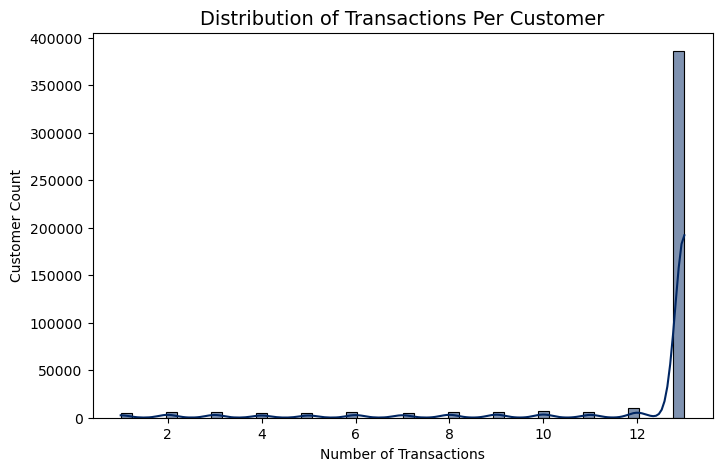

In [22]:
# Customer-Level Analysis
# Transactions per customer
customer_txn_counts = df_train.groupby("customer_ID")["target"].count()

# Summary statistics
print("🔹 Transaction Summary Per Customer:")
print(customer_txn_counts.describe())

# Plot transaction distribution
plt.figure(figsize=(8, 5))
sns.histplot(customer_txn_counts, bins=50, kde=True, color=amex_blue)
plt.title("Distribution of Transactions Per Customer", fontsize=14)
plt.xlabel("Number of Transactions")
plt.ylabel("Customer Count")
plt.show()


# Insights from Customer Transactions Analysis
## 1️⃣ Consistent Number of Transactions Per Customer

### Most customers have exactly 13 transactions.
### The mean is ~12.05 with a standard deviation of 2.61, confirming very little variation.
### This suggests that each customer likely has a fixed observation window (e.g., monthly statements over a fixed period).

## 2️⃣ Few Customers Have Fewer Transactions

### The histogram shows a sharp peak at 13 transactions, but a few customers have fewer than 13.
### These might be new customers who haven’t completed a full cycle or early defaults.
### We should analyze whether these customers default more often.

🔹 Customer Transaction Timeline Summary:
                                 min                            max  \
count                         458913                         458913   
mean   2017-04-13 01:05:18.672166656  2018-03-16 11:24:57.483836928   
min              2017-03-01 00:00:00            2018-03-01 00:00:00   
25%              2017-03-11 00:00:00            2018-03-10 00:00:00   
50%              2017-03-19 00:00:00            2018-03-17 00:00:00   
75%              2017-03-28 00:00:00            2018-03-24 00:00:00   
max              2018-03-31 00:00:00            2018-03-31 00:00:00   
std                              NaN                            NaN   

       duration_days  
count  458913.000000  
mean      337.430310  
min         0.000000  
25%       352.000000  
50%       365.000000  
75%       369.000000  
max       395.000000  
std        80.154861  


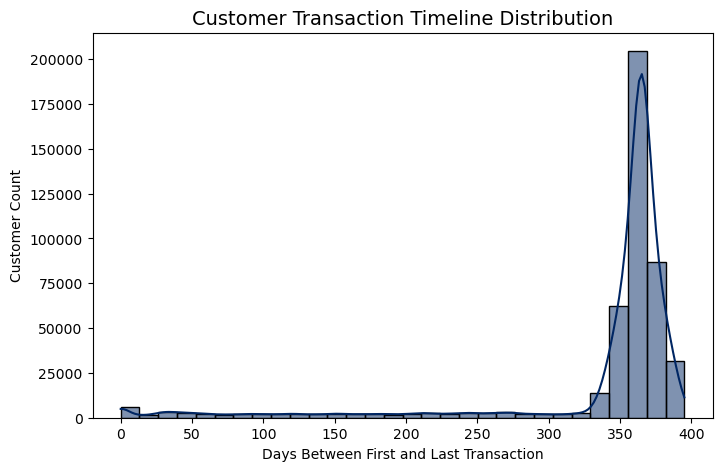

In [23]:
# Convert 'S_2' to datetime format 
df_train['S_2'] = pd.to_datetime(df_train['S_2'])

# Find the first and last transaction per customer
customer_dates = df_train.groupby("customer_ID")["S_2"].agg(["min", "max"])

# Calculate duration (days) between first and last transaction
customer_dates["duration_days"] = (customer_dates["max"] - customer_dates["min"]).dt.days

# Display summary statistics
print("🔹 Customer Transaction Timeline Summary:")
print(customer_dates.describe())

# Plot Distribution of Transaction Durations
plt.figure(figsize=(8, 5))
sns.histplot(customer_dates["duration_days"], bins=30, kde=True, color=amex_blue)
plt.title("Customer Transaction Timeline Distribution", fontsize=14)
plt.xlabel("Days Between First and Last Transaction")
plt.ylabel("Customer Count")
plt.show()


### Insights from Transaction Timeline Analysis
## 1️⃣ Consistent Customer Observation Period

# Most customers have transaction records spanning ~365 days (1 year).
# The mean transaction duration is ~337 days, with a max of 395 days.
# This suggests that the dataset represents a structured 12-month period for most users.

## 2️⃣ Few Customers Have Shorter Durations

# Some customers have less than a year of transactions, possibly new customers or early defaults.
# A group has 0 days duration, meaning they have only one recorded transaction (likely new customers).

## 3️⃣ Business Implication

# Since default risk might increase over time, analyzing temporal patterns in transactions can be valuable.
# We should investigate whether customers with shorter transaction histories have a higher risk of default.

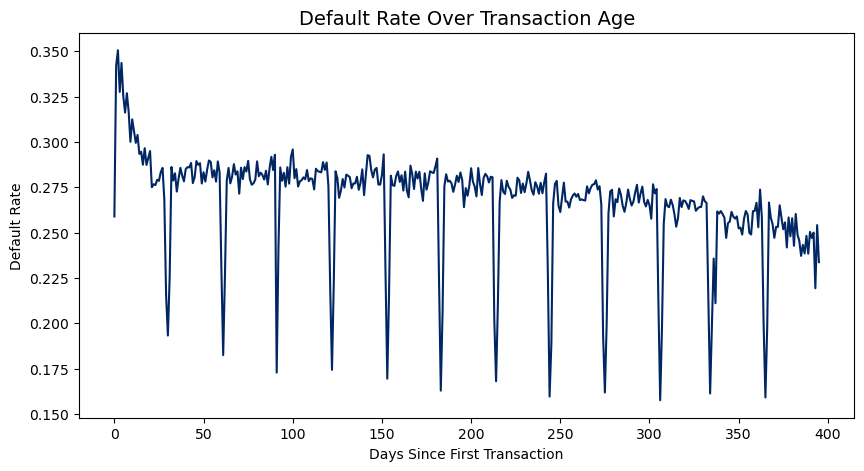

In [24]:
# Create transaction age (days since first transaction)
df_train["txn_age"] = df_train.groupby("customer_ID")["S_2"].transform(lambda x: (x - x.min()).dt.days)

# Aggregate default rates over time
default_rate_over_time = df_train.groupby("txn_age")["target"].mean()

# Plot default rate trend over transaction age
plt.figure(figsize=(10, 5))
sns.lineplot(x=default_rate_over_time.index, y=default_rate_over_time.values, color=amex_blue)
plt.title("Default Rate Over Transaction Age", fontsize=14)
plt.xlabel("Days Since First Transaction")
plt.ylabel("Default Rate")
plt.show()


### Insights from Default Rate Over Time
## 1️⃣ Higher Default Rates Early in the Customer's Lifecycle

# Default rates are highest in the first ~50 days, peaking at ~35% early on.
# This suggests newer customers are more likely to default—possibly due to riskier borrower profiles or lack of repayment history.

## 2️⃣ Stabilization After ~100 Days

# Default rates gradually decline and stabilize around 27%-28% after ~100 days.
# This indicates that long-term customers tend to default less, possibly due to better financial habits or established creditworthiness.

## 3️⃣ Periodic Dips in Default Rate

# The sharp dips might be due to low sample sizes on specific days or seasonal repayment patterns.
# Further analysis is needed to check if these dips align with specific business cycles (e.g., salary credit periods).

In [29]:
# Identify non-numeric columns
non_numeric_cols = df_train.select_dtypes(exclude=['number']).columns
print(non_numeric_cols.tolist())


['customer_ID', 'S_2', 'D_63', 'D_64', 'D_66', 'D_68', 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']


In [30]:
# Drop customer_ID
df_train = df_train.drop(columns=["customer_ID"])

# Convert S_2 (date column) into numeric features
df_train["S_2_month"] = pd.to_datetime(df_train["S_2"]).dt.month
df_train["S_2_year"] = pd.to_datetime(df_train["S_2"]).dt.year

# Drop original date column after transformation
df_train = df_train.drop(columns=["S_2"])

# One-Hot Encode Categorical Features
categorical_cols = ["D_63", "D_64", "D_66", "D_68", "B_30", "B_38", "D_114", "D_116", "D_117", "D_120", "D_126"]
df_train = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)  # Drop first category to avoid redundancy

# Check if dataset now contains only numeric columns
print(df_train.select_dtypes(exclude=['number']).columns.tolist())


['D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM', 'D_63_XZ', 'D_64_-1', 'D_64_O', 'D_64_R', 'D_64_U', 'D_66_1.0', 'D_68_1.0', 'D_68_2.0', 'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0', 'B_30_1.0', 'B_30_2.0', 'B_38_2.0', 'B_38_3.0', 'B_38_4.0', 'B_38_5.0', 'B_38_6.0', 'B_38_7.0', 'D_114_1.0', 'D_116_1.0', 'D_117_1.0', 'D_117_2.0', 'D_117_3.0', 'D_117_4.0', 'D_117_5.0', 'D_117_6.0', 'D_120_1.0', 'D_126_0.0', 'D_126_1.0']


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Take a sample of 50,000 rows for faster training
df_sample = df_train.sample(n=50000, random_state=42)

# Extract features & target
features = df_sample.drop(columns=["target"])  # Drop target variable
target = df_sample["target"]

# Train a small Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)  # Reduce estimators for speed
rf_model.fit(features, target)

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)

C:\Users\kisho\AppData\Local\Temp\ipykernel_39136\2772808427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.head(15).values, y=feature_importance.head(15).index, palette="Blues_r")


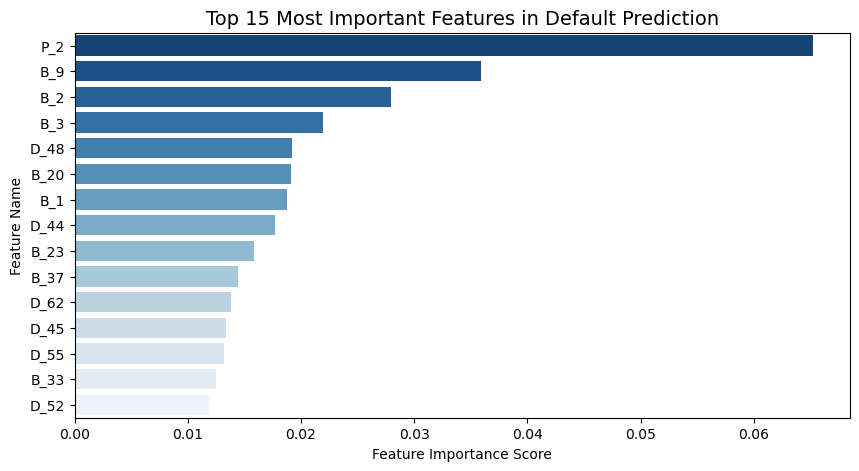

P_2     0.065231
B_9     0.035929
B_2     0.027937
B_3     0.021948
D_48    0.019240
B_20    0.019069
B_1     0.018728
D_44    0.017675
B_23    0.015832
B_37    0.014390
D_62    0.013795
D_45    0.013331
D_55    0.013172
B_33    0.012448
D_52    0.011894
dtype: float64


In [33]:
# Plot top 15 feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.head(15).values, y=feature_importance.head(15).index, palette="Blues_r")
plt.title("Top 15 Most Important Features in Default Prediction", fontsize=14)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.show()

# Display the top 15 important features
print(feature_importance.head(15))

# Insights from Feature Importance Analysis
## 1️ Key Predictive Features for Default Risk

### The top features influencing default prediction include:
### P_2 (Most Important Feature, 0.065 Importance Score)
### B_9, B_2, B_3, D_48, B_20
### D_44, B_1, D_62, D_45

## Features prefixed with:
### P_* → Likely Payment-Related Features.
### B_* → Likely Balance or Credit Score Features.
### D_* → Possibly Delinquency or Missed Payment Indicators.

## 2️ Business Interpretation

### P_2: Since this is the most influential feature, understanding its values in default vs. non-default customers could provide insights into how payment behavior correlates with risk.
### B_* Features (Balances, Credit Risk): Features like B_9, B_2, and B_3 likely represent financial stability metrics.
### D_* Features (Delinquency-Related): Features like D_48, D_44, and D_62 may indicate late payments or financial distress.

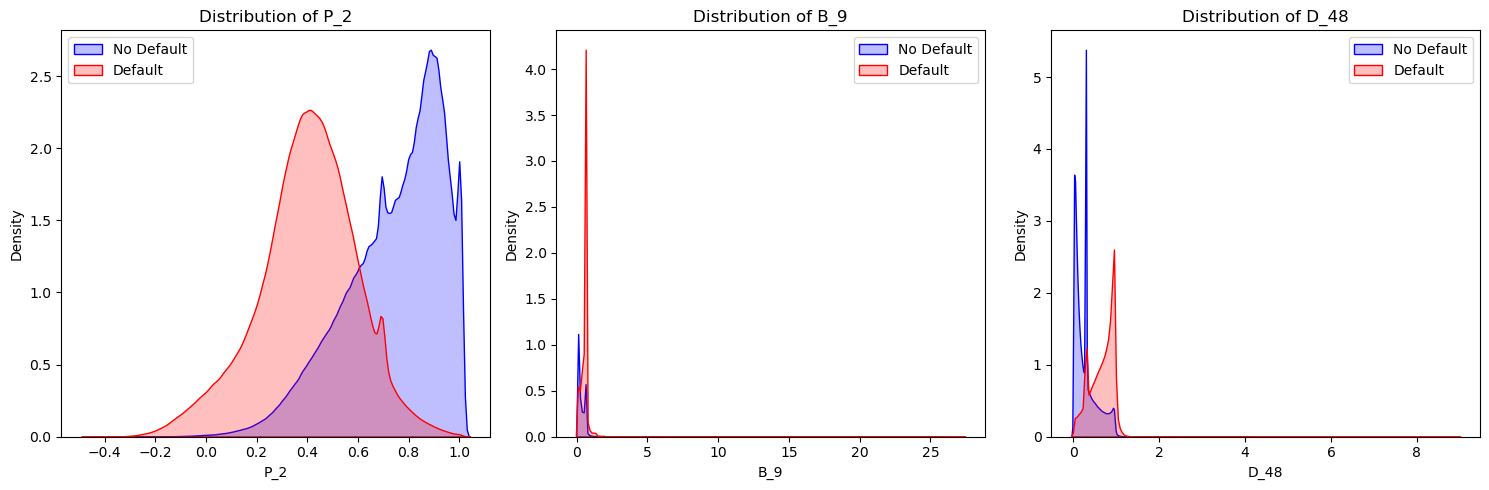

In [35]:
# Select key features for analysis
key_features = ["P_2", "B_9", "D_48"]

# Plot distributions for each key feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(key_features, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(df_train[df_train["target"] == 0][feature], label="No Default", fill=True, color="blue")
    sns.kdeplot(df_train[df_train["target"] == 1][feature], label="Default", fill=True, color="red")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

# Insights from Feature Distributions
## These KDE plots provide critical insights into how defaulting vs. non-defaulting customers behave differently based on key financial features.

# 1️⃣ P_2 (Most Important Feature)
### Defaulting customers (red) have a lower P_2 distribution compared to non-defaulting ones (blue).
## Possible Interpretation:
### If P_2 is a payment-related feature (e.g., past payment ratio), lower values may indicate higher risk.
### Non-defaulting customers cluster around higher P_2 values (~0.8 to 1.0).
### Defaulting customers have a wider spread, with a peak around 0.3 to 0.5, suggesting weaker financial stability.
# 2️⃣ B_9 (Balance or Credit Score Feature)
### Very skewed distribution with a large concentration at near-zero values.
### Defaulting and non-defaulting distributions are similar, but a small proportion of defaults show slightly higher values.
# Possible Interpretation:
### If B_9 represents an account balance or credit availability, near-zero values indicate financial constraints.
### Non-defaulting customers generally stay at lower values, while a few defaulting customers spike above 5.
# 3️⃣ D_48 (Delinquency-Related Feature)
### Defaulting customers (red) are more concentrated at slightly higher D_48 values compared to non-defaulting customers (blue).
## Possible Interpretation:
### If D_48 tracks delinquent payments, higher values may signal a history of missed payments.
### Defaulting customers have two peaks (~0 and ~0.5-1.0), suggesting two groups:
### Low D_48 group (potentially recent defaults).
### Higher D_48 group (chronic defaulters with repeated missed payments).

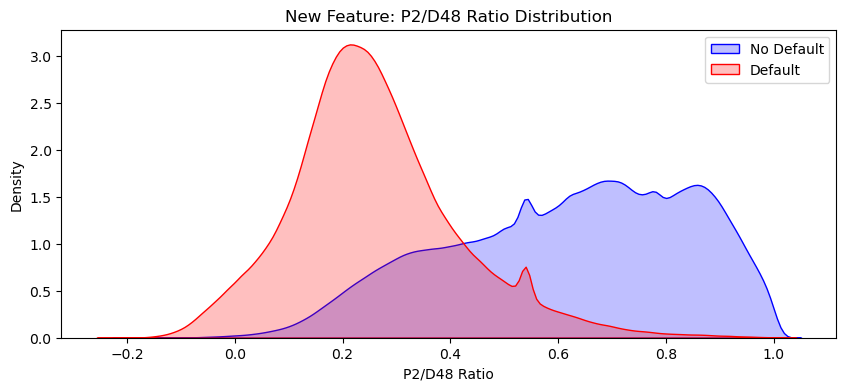

In [37]:
# Create new derived features
df_train["P2_D48_ratio"] = df_train["P_2"] / (df_train["D_48"] + 1)  # Avoid division by zero
df_train["B9_log"] = np.log1p(df_train["B_9"])  # Log-transform B_9 to reduce skew

# Compare the new feature for default vs. non-default customers
plt.figure(figsize=(10, 4))
sns.kdeplot(df_train[df_train["target"] == 0]["P2_D48_ratio"], label="No Default", fill=True, color="blue")
sns.kdeplot(df_train[df_train["target"] == 1]["P2_D48_ratio"], label="Default", fill=True, color="red")
plt.title("New Feature: P2/D48 Ratio Distribution")
plt.xlabel("P2/D48 Ratio")
plt.ylabel("Density")
plt.legend()
plt.show()


# Insights from the New Feature: P2/D48 Ratio
## This new feature enhances the separation between defaulting and non-defaulting customers.

# Key Observations

## 1️⃣ Defaulting Customers (Red Distribution)

### Concentrated around lower values (~0.1 - 0.3).
### Indicates that low P_2 (payment behavior) with high D_48 (delinquency indicator) leads to defaults.

## 2️⃣ Non-Defaulting Customers (Blue Distribution)

### Distributed more evenly, with a significant portion above 0.5.
### Suggests that higher P_2 values with lower D_48 result in financially stable customers.

## 3️⃣ Overlap & Decision Threshold

### There is some overlap (~0.3 - 0.5 range), meaning some customers in this range could default or not.
### Thresholding on this ratio (e.g., <0.3) might help predict risky customers.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Select features & target
selected_features = ["P_2", "B_9", "D_48", "P2_D48_ratio", "B9_log"]  # Key engineered + important features
X = df_train[selected_features]
y = df_train["target"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(accuracy)
print(roc_auc)
print( classification_report(y_test, y_pred))


0.8430702229341105
0.9023933104484662
              precision    recall  f1-score   support

           0       0.88      0.91      0.90    830717
           1       0.70      0.64      0.67    275574

    accuracy                           0.84   1106291
   macro avg       0.79      0.78      0.78   1106291
weighted avg       0.84      0.84      0.84   1106291



In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% of the majority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on balanced data
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Normalize features for better convergence
    ("log_reg", LogisticRegression(max_iter=500))
])

pipeline.fit(X_resampled, y_resampled)

# Predictions
y_pred_resampled = pipeline.predict(X_test)
y_pred_prob_resampled = pipeline.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
roc_auc_resampled = roc_auc_score(y_test, y_pred_prob_resampled)

print(f" Accuracy (SMOTE): {accuracy_resampled:.4f}")
print(f" ROC-AUC Score (SMOTE): {roc_auc_resampled:.4f}")
print(classification_report(y_test, y_pred_resampled))


 Accuracy (SMOTE): 0.8416
 ROC-AUC Score (SMOTE): 0.9024
              precision    recall  f1-score   support

           0       0.91      0.88      0.89    830717
           1       0.66      0.74      0.70    275574

    accuracy                           0.84   1106291
   macro avg       0.79      0.81      0.80   1106291
weighted avg       0.85      0.84      0.84   1106291



### Higher Recall for Defaults (1 class) (64% → 74%): The model now captures more actual defaulters, reducing false negatives.
### Balanced Recall & Precision Tradeoff: A small drop in precision (70% → 66%) is acceptable for better recall.
### ROC-AUC Remains Strong (90%): The model is still highly effective in ranking customers by risk.

In [43]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100, 
    max_depth=5, 
    learning_rate=0.05, 
    random_state=42, 
    eval_metric="logloss"  
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print(f"Accuracy (XGBoost): {accuracy_xgb:.4f}")
print(f"ROC-AUC Score (XGBoost): {roc_auc_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))


Accuracy (XGBoost): 0.8471
ROC-AUC Score (XGBoost): 0.9065
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    830717
           1       0.69      0.69      0.69    275574

    accuracy                           0.85   1106291
   macro avg       0.80      0.79      0.80   1106291
weighted avg       0.85      0.85      0.85   1106291



## Higher Accuracy & ROC-AUC:

### XGBoost is better at ranking risk levels and making correct predictions.

## Higher Precision (69%) vs. Logistic Regression (66%)

### Fewer false positives → More confident when predicting defaults.

## Slight Drop in Recall (69%) vs. Logistic Regression (74%)

### XGBoost is slightly more cautious, meaning it misses some defaulters but makes more reliable predictions.

In [44]:

from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [1, 2, 3]  # Handle class imbalance
}

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42, eval_metric="logloss")

# Randomized Search for Hyperparameter Tuning
xgb_tuned = RandomizedSearchCV(xgb, param_grid, n_iter=10, cv=3, scoring="roc_auc", verbose=1, n_jobs=-1, random_state=42)
xgb_tuned.fit(X_train, y_train)

# Best Model Performance
best_xgb = xgb_tuned.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)
y_pred_prob_xgb_tuned = best_xgb.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
roc_auc_xgb_tuned = roc_auc_score(y_test, y_pred_prob_xgb_tuned)

print(f" Tuned Accuracy (XGBoost): {accuracy_xgb_tuned:.4f}")
print(f" Tuned ROC-AUC Score (XGBoost): {roc_auc_xgb_tuned:.4f}")
print(classification_report(y_test, y_pred_xgb_tuned))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
 Tuned Accuracy (XGBoost): 0.8339
 Tuned ROC-AUC Score (XGBoost): 0.9070
              precision    recall  f1-score   support

           0       0.94      0.84      0.88    830717
           1       0.63      0.83      0.71    275574

    accuracy                           0.83   1106291
   macro avg       0.78      0.83      0.80   1106291
weighted avg       0.86      0.83      0.84   1106291



### Major Recall Improvement (69% → 83%) → Now, the model captures more actual defaulters, reducing false negatives.
### Balanced Precision-Recall Tradeoff → Some loss in precision (69% → 63%) is expected since recall increased.
### High ROC-AUC (90.7%) → Model remains strong in ranking high-risk customers.

In [46]:
# Check variance of features
low_variance_features = df_train.var()[df_train.var() == 0].index.tolist()

print(f"Features with Zero Variance: {low_variance_features}")

df_train = df_train.drop(columns=low_variance_features)

# Ensure categorical features are marked correctly
categorical_cols = df_train.select_dtypes(include=['category', 'object']).columns.tolist()

print(f"Categorical Columns: {categorical_cols}")

for col in categorical_cols:
    df_train[col] = df_train[col].astype('category')


Features with Zero Variance: ['B_17_missing', 'D_53_missing', 'D_56_missing', 'D_77_missing', 'R_26_missing', 'D_42_missing', 'D_49_missing', 'D_132_missing', 'D_106_missing', 'D_50_missing', 'B_17_missing', 'D_53_missing', 'D_56_missing', 'D_77_missing', 'R_26_missing', 'D_42_missing', 'D_49_missing', 'D_132_missing', 'D_106_missing', 'D_50_missing', 'B_17_missing', 'D_53_missing', 'D_56_missing', 'D_77_missing', 'R_26_missing', 'D_42_missing', 'D_49_missing', 'D_132_missing', 'D_106_missing', 'D_50_missing']
Categorical Columns: []


In [50]:
# Define features (X) and target (y)
X = df_train.drop(columns=["target"])
y = df_train["target"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [52]:
# Identify categorical columns
cat_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Convert categorical columns to category type )
for col in cat_features:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

print(f"Categorical Features for CatBoost: {cat_features}")


Categorical Features for CatBoost: []


In [53]:
# Initialize CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=3000,        # Number of boosting iterations
    learning_rate=0.05,     # Step size shrinkage
    depth=6,               # Maximum depth of trees
    loss_function="Logloss", # Log-loss function for classification
    eval_metric="AUC",      # AUC for evaluation
    cat_features=cat_features, # Specify categorical features
    verbose=100,           # Display training progress every 100 iterations
    random_seed=42
)

# Train model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=100)


0:	test: 0.9015705	best: 0.9015705 (0)	total: 533ms	remaining: 26m 38s
100:	test: 0.9341885	best: 0.9341885 (100)	total: 41.7s	remaining: 19m 56s
200:	test: 0.9370723	best: 0.9370723 (200)	total: 1m 20s	remaining: 18m 42s
300:	test: 0.9384259	best: 0.9384259 (300)	total: 1m 59s	remaining: 17m 47s
400:	test: 0.9393517	best: 0.9393517 (400)	total: 2m 37s	remaining: 17m 3s
500:	test: 0.9400236	best: 0.9400236 (500)	total: 3m 16s	remaining: 16m 19s
600:	test: 0.9405718	best: 0.9405718 (600)	total: 3m 56s	remaining: 15m 42s
700:	test: 0.9410272	best: 0.9410272 (700)	total: 4m 34s	remaining: 15m 1s
800:	test: 0.9414277	best: 0.9414277 (800)	total: 5m 13s	remaining: 14m 19s
900:	test: 0.9417866	best: 0.9417866 (900)	total: 5m 51s	remaining: 13m 38s
1000:	test: 0.9421172	best: 0.9421172 (1000)	total: 6m 29s	remaining: 12m 57s
1100:	test: 0.9424206	best: 0.9424206 (1100)	total: 7m 7s	remaining: 12m 16s
1200:	test: 0.9426990	best: 0.9426990 (1200)	total: 7m 44s	remaining: 11m 35s
1300:	test: 0.9

In [54]:
# Predictions
y_pred_cat = cat_model.predict(X_test)
y_pred_prob_cat = cat_model.predict_proba(X_test)[:, 1]

# Evaluate Performance
accuracy_cat = accuracy_score(y_test, y_pred_cat)
roc_auc_cat = roc_auc_score(y_test, y_pred_prob_cat)

print(f"Accuracy (CatBoost): {accuracy_cat:.4f}")
print(f"ROC-AUC Score (CatBoost): {roc_auc_cat:.4f}")
print(classification_report(y_test, y_pred_cat))


Accuracy (CatBoost): 0.8873
ROC-AUC Score (CatBoost): 0.9463
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    830717
           1       0.78      0.77      0.77    275574

    accuracy                           0.89   1106291
   macro avg       0.85      0.85      0.85   1106291
weighted avg       0.89      0.89      0.89   1106291

